# Part 2 -  Model creation
In this part we are going to create the neural network model and train.

## Loding Libraries
Here we load the common libraries

In [1]:
import numpy as np
from grabscreen import grab_screen
import cv2
#import tdqm
import os
import pandas as pd
#from tqdm import tqdm
from collections import deque
from models import inception_v3 as googlenet
from models import alexnet2
from random import shuffle

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


# Analysis of the Input file
We are going to analize the files  that we have created in the part 1
Let us first select the first created file.

In [2]:
#Preprocessed image rgb color - no image filters
file_name = "preprocessed_training_data-1.npy"
#file_name = "training_data-1.npy"

In [3]:
#Processed image single color
#file_name = "processed_training_data-1.npy"

In [4]:
# full file info
train_data = np.load(file_name,allow_pickle=True)

In [5]:
# This file has the following shape
train_data.shape
#(500, 2)

(500, 2)

In [6]:
#train_data

In [7]:
type(train_data )

numpy.ndarray

The the first three input frames are presented as:

In [8]:
train_data[0][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [9]:
train_data[1][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [10]:
train_data[2][1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

There are 29 input componentes for each frame, we can plot the histogram for each component

In [11]:
train_hist = train_data[:]

In [12]:
train_hist.shape

(500, 2)

In [13]:
df = pd.DataFrame()
for i in range(len(train_hist)):
    row=list(train_hist[i][1])
    #print(row)
    temp = pd.DataFrame([row])
   # print(temp)
    df = pd.concat([df, temp])
  

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


We can analize the train data

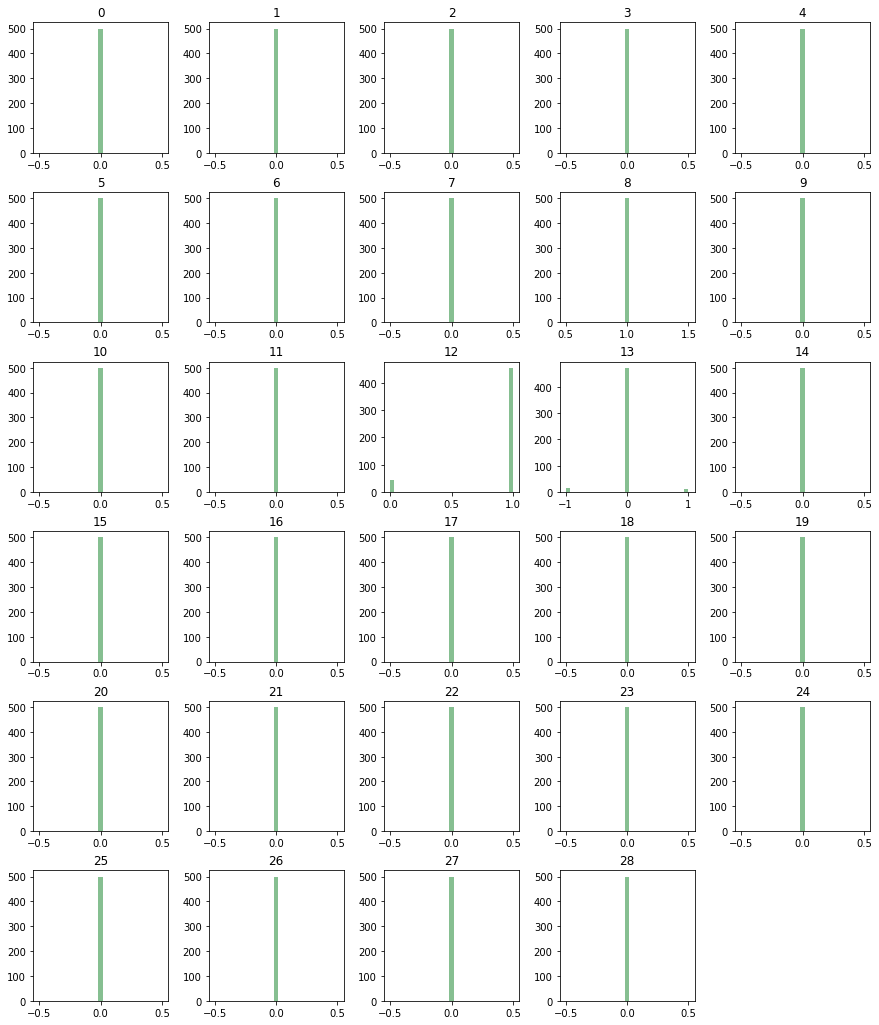

In [16]:
ax = df.hist(bins=29, grid=False, figsize=(15,18), color='#86bf91', zorder=5, rwidth=5)

In [17]:
train = train_data[:-50]
test = train_data[-50:]

In [18]:
#test

In [19]:
test.shape
#(50, 2)

(50, 2)

In [20]:
train.shape
#(450, 2)

(450, 2)

We begin the train part

## Train Image part

In [21]:
X_image = np.array([i[0] for i in train])

In [22]:
X_image.shape
#(450, 270, 480, 3)

(450, 270, 480, 3)

In [23]:
X_image[449][269][3]

array([0, 0, 0], dtype=uint8)

In [24]:
#(450, 270, 480, 3)  We choose only the imagen part of the train data, 
#There are 450 picturtes with resolutionn WIDTH = 480 and HEIGHT = 270 with 3 colors rgb

In [25]:
# We perform the reshape

numpy.reshape(a, newshape, order='C')

- a - Array to be reshaped.
- newshape  - The new shape should be compatible with the original shape.

- order- Read the elements of a using this index order, and place the elements into the reshaped array using this index order.

Gives a new shape to an array without changing its data.

In [26]:
WIDTH = 480
HEIGHT = 270

In [27]:
# For preprocessed rgb
X=X_image.reshape(-1,WIDTH,HEIGHT,3)
X.shape
#(450, 480, 270, 3) For 3 colors

(450, 480, 270, 3)

In [28]:
# For processed uone color
#X=X_image.reshape(-1,WIDTH,HEIGHT,1)
#X.shape
#(450, 480, 270, 1) For one color

## Train Input part

In [29]:
Y = [i[1] for i in train]
#Z = [i[2] for i in train]

We begin the test part

## Test Image part

In [30]:
test_image = np.array([i[0] for i in test])

In [31]:
type(test_image)

numpy.ndarray

In [32]:
test_image.shape
#(50, 270, 480, 3)

(50, 270, 480, 3)

numpy.reshape(a, newshape, order='C')

- a - Array to be reshaped.
- newshape  - The new shape should be compatible with the original shape.

- order- Read the elements of a using this index order, and place the elements into the reshaped array using this index order.

Gives a new shape to an array without changing its data.

TODO We have to understand why I was 3 in order in reshape(-1,WIDTH,HEIGHT,3)

In [33]:
#For Preprocessed
test_x=test_image.reshape(-1,WIDTH,HEIGHT,3)
test_x.shape
#(50, 480, 270, 3)

(50, 480, 270, 3)

In [34]:
#For Processed
#test_x=test_image.reshape(-1,WIDTH,HEIGHT,1)
#test_x.shape

## Test Input part

In [35]:
test_y = [i[1] for i in test]

In [36]:
#FILE_I_END = 1860
FILE_I_END = 2
WIDTH = 480
HEIGHT = 270
LR = 1e-3
#EPOCHS = 30
EPOCHS = 1
MODEL_NAME = 'model/test'
PREV_MODEL = ''
LOAD_MODEL = True

wl = 0
sl = 0
al = 0
dl = 0

wal = 0
wdl = 0
sal = 0
sdl = 0
nkl = 0

w = [1,0,0,0,0,0,0,0,0]
s = [0,1,0,0,0,0,0,0,0]
a = [0,0,1,0,0,0,0,0,0]
d = [0,0,0,1,0,0,0,0,0]
wa = [0,0,0,0,1,0,0,0,0]
wd = [0,0,0,0,0,1,0,0,0]
sa = [0,0,0,0,0,0,1,0,0]
sd = [0,0,0,0,0,0,0,1,0]
nk = [0,0,0,0,0,0,0,0,1]

In [37]:
len(nk )

9

In [38]:
#model = googlenet(WIDTH, HEIGHT, 3, LR, output=9, model_name=MODEL_NAME)

In [39]:
size=[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0]

In [40]:
len(size)

29

In [41]:
model = googlenet(WIDTH, HEIGHT, 3, LR, output=29, model_name=MODEL_NAME)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [42]:
model.fit({'input': X}, 
          {'targets': Y}, 
          n_epoch=1, 
          validation_set=({'input': test_x},{'targets': test_y}), 
          snapshot_step=2500, 
          show_metric=True, 
          run_id=MODEL_NAME)

Training Step: 7  | total loss: 3.46436 | time: 19.474s
| Momentum | epoch: 001 | loss: 3.46436 - acc: 0.5177 -- iter: 448/450
Training Step: 8  | total loss: 2.96480 | time: 26.009s
| Momentum | epoch: 001 | loss: 2.96480 - acc: 0.5693 | val_loss: 1.21039 - val_acc: 0.0000 -- iter: 450/450
--


In [43]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [ ]:
restartkernel()

## Full code

In [1]:
import numpy as np
from grabscreen import grab_screen
import cv2
#import tdqm
import os
import pandas as pd
#from tqdm import tqdm
from collections import deque
from models import inception_v3 as googlenet
from models import alexnet2
from random import shuffle

#FILE_I_END = 1860
FILE_I_END = 30
#FILE_I_END = 2
WIDTH = 480
HEIGHT = 270
LR = 1e-3
#EPOCHS = 32
EPOCHS = 1
MODEL_NAME = 'model/test'
PREV_MODEL = ''
LOAD_MODEL = False
wl = 0
sl = 0
al = 0
dl = 0
wal = 0
wdl = 0
sal = 0
sdl = 0
nkl = 0
w = [1,0,0,0,0,0,0,0,0]
s = [0,1,0,0,0,0,0,0,0]
a = [0,0,1,0,0,0,0,0,0]
d = [0,0,0,1,0,0,0,0,0]
wa = [0,0,0,0,1,0,0,0,0]
wd = [0,0,0,0,0,1,0,0,0]
sa = [0,0,0,0,0,0,1,0,0]
sd = [0,0,0,0,0,0,0,1,0]
nk = [0,0,0,0,0,0,0,0,1]
model = googlenet(WIDTH, HEIGHT, 3, LR, output=29, model_name=MODEL_NAME)
if LOAD_MODEL:
    model.load(PREV_MODEL)
    print('We have loaded a previous model!!!!')
# iterates through the training files
for e in range(EPOCHS):
    data_order = [i for i in range(1,FILE_I_END+1)]
    shuffle(data_order)
    for count,i in enumerate(data_order):
        try:
            #Preprocessed image rgb color - no image filters
            file_name = 'preprocessed_training_data-{}.npy'.format(i)
            # full file info
            train_data = np.load(file_name,allow_pickle=True)
            train = train_data[:-50]
            test = train_data[-50:]
            X_image = np.array([i[0] for i in train])
            # For preprocessed rgb
            X=X_image.reshape(-1,WIDTH,HEIGHT,3)
            Y = [i[1] for i in train]
            test_image = np.array([i[0] for i in test])
            #For Preprocessed
            test_x=test_image.reshape(-1,WIDTH,HEIGHT,3)
            test_y = [i[1] for i in test]           
            model.fit({'input': X}, 
                      {'targets': Y}, 
                      n_epoch=1, 
                      validation_set=({'input': test_x},{'targets': test_y}), 
                      snapshot_step=2500, 
                      show_metric=True, 
                      run_id=MODEL_NAME)
            if count%10 == 0:
                print('SAVING MODEL!')
                model.save(MODEL_NAME)                  
        except Exception as e:
            print(str(e))

Training Step: 239  | total loss: 1.55441 | time: 9.433s
| Momentum | epoch: 030 | loss: 1.55441 - acc: 0.5055 -- iter: 448/450
Training Step: 240  | total loss: 1.57496 | time: 10.542s
| Momentum | epoch: 030 | loss: 1.57496 - acc: 0.5096 | val_loss: 1.39101 - val_acc: 0.0000 -- iter: 450/450
--


## Alternative Approaches
In this notebook we have used InceptionV3, however it is possible use differnet available  popular neural networks.
Taking into account Keras, In deep learning models there are some applications available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

Weights are downloaded automatically when instantiating a model. They are stored at ~/.keras/models/.

Upon instantiation, the models will be built according to the image data format set in your Keras configuration file at ~/.keras/keras.json. For instance, if you have set image_data_format=channels_last, then any model loaded from this repository will get built according to the TensorFlow data format convention, "Height-Width-Depth".

Available models
Model	Size (MB)	Top-1 Accuracy	Top-5 Accuracy	Parameters	Depth	Time (ms) per inference step (CPU)	Time (ms) per inference step (GPU)
- Xception	88	79.0%	94.5%	22.9M	81	109.4	8.1
- VGG16	528	71.3%	90.1%	138.4M	16	69.5	4.2
- VGG19	549	71.3%	90.0%	143.7M	19	84.8	4.4
- ResNet50	98	74.9%	92.1%	25.6M	107	58.2	4.6
- ResNet50V2	98	76.0%	93.0%	25.6M	103	45.6	4.4
- ResNet101	171	76.4%	92.8%	44.7M	209	89.6	5.2
- ResNet101V2	171	77.2%	93.8%	44.7M	205	72.7	5.4
- ResNet152	232	76.6%	93.1%	60.4M	311	127.4	6.5
- ResNet152V2	232	78.0%	94.2%	60.4M	307	107.5	6.6
- InceptionV3	92	77.9%	93.7%	23.9M	189	42.2	6.9